In [57]:
!pip install plotly-express
#!pip install shapely

You should consider upgrading via the 'd:\program\python\python.exe -m pip install --upgrade pip' command.


In [56]:
pip list

Package                Version
---------------------- -----------
anyio                  3.5.0
argon2-cffi            21.3.0
argon2-cffi-bindings   21.2.0
asgiref                3.4.1
astroid                2.9.3
asttokens              2.0.5
atomicwrites           1.4.0
attrs                  21.4.0
backcall               0.2.0
backports.zoneinfo     0.2.1
beautifulsoup4         4.11.1
bleach                 4.1.0
bqplot                 0.12.33
certifi                2021.10.8
cffi                   1.15.0
charset-normalizer     2.0.11
click                  8.1.3
click-plugins          1.1.1
cligj                  0.7.2
colorama               0.4.4
coverage               6.3.1
cryptography           36.0.1
cycler                 0.11.0
Cython                 0.29.28
debugpy                1.5.1
decorator              5.1.1
defusedxml             0.7.1
Django                 4.0.1
django-cors-headers    3.11.0
djangorestframework    3.13.1
entrypoints            0.4
executing          

You should consider upgrading via the 'D:\program\Python\python.exe -m pip install --upgrade pip' command.


In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import typing
import project as p
import plotly.express as px

### Hypothesis 1: The borrowers using Lending Club have worse economic situations than borrowers from all other lending resources

To explore whether and to what extent the above findings on good debt and bad debt can be generalized to other general borrowing channels, our team wanted to explore the differences in economic status between those who borrow at lending club and other general borrowers. We assumed that borrowers in lending club would be worse off than other general borrowers and selected income, debt, and income to debt ratio as measures.
We used data from Survey of Consumer Finances in 2010 and 2019 as sample of general borrowers by filtering data points with debt. We also adjusted the effect of inflation on data in 2019 based on Consumer Price Index(CPI).

data source: https://www.federalreserve.gov/econres/scf_2010.htm#EXCELDATEX  
detailed description: https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbkx01.htm#1.HEADING  
cpi source: https://www.minneapolisfed.org/about-us/monetary-policy/inflation-calculator/consumer-price-index-1913-

In [3]:
#load data
scfp2010 = pd.read_csv("SCFP2010.csv")
scfp2019 = pd.read_csv("SCFP2019.csv")
loan = pd.read_csv("loans_full_schema.csv")
# filter people who have debt
scfp2010 = p.filter_debt(scfp2010)
scfp2019 = p.filter_debt(scfp2019)
# group by case id
scfp2010_byCase = p.group_by_case(scfp2010)
scfp2019_byCase = p.de_inflation(p.group_by_case(scfp2019))
#sample data
scfp2019_byCase

,INCOME,DEBT,DEBT2INC,deinf_INCOME,deinf_DEBT,deinf_DEBT2INC
YY1,,,,,,
2,38484.856680,13920.0,0.361557,32825.761603,11873.101291,0.361557
3,104866.143860,250.0,0.002384,89445.858333,213.238170,0.002384
4,124210.383990,388900.0,3.130978,105945.579774,331713.296832,3.130978
5,29729.042725,680.0,0.022877,25357.466634,580.007822,0.022877
6,27489.183342,14054.0,0.511256,23446.972573,11987.396950,0.511256
...,...,...,...,...,...,...
5809,3481.963223,738.0,0.216294,2969.949859,629.479077,0.216294
5810,52534.883721,10400.0,0.198101,44809.769806,8870.707861,0.198101
5811,356748.512710,774000.0,2.169600,304289.599617,660185.373485,2.169600


### compare income

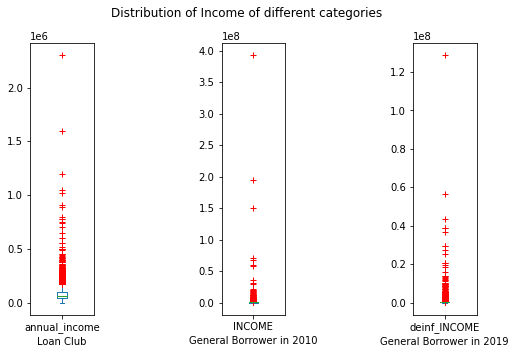

In [4]:
loan_Income=loan["annual_income"]
scfp2010_Income = scfp2010_byCase["INCOME"]
scfp2019_Income = scfp2019_byCase["deinf_INCOME"]
p.draw_outliers([loan_Income, scfp2010_Income, scfp2019_Income], 'Distribution of Income of different categories')

Since there were too many outliers in the sample, making the total income range very large, we filtered the group with annual income less than 200,000 to obtain more significant visualization results. We will conduct a separate analysis later for those with incomes greater than 200,000.

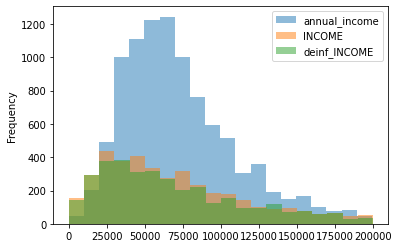

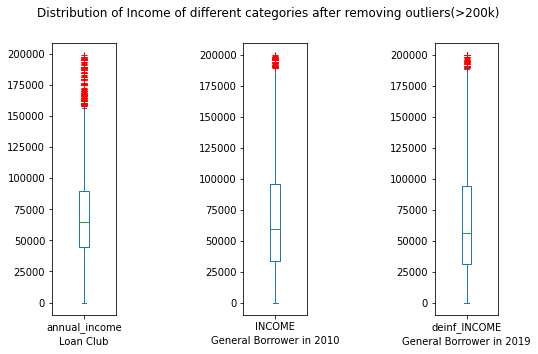

In [42]:
income_remove_outlier=p.remove_outlier([loan_Income, scfp2010_Income,scfp2019_Income], 200000)
p.draw_outliers(income_remove_outlier, 'Distribution of Income of different categories after removing outliers(>200k)')

When high income is removed, we can see that the main annual income ranges of these three groups are very close to each other. However, the main center of distribution for those who borrowed at lending club is located in the range of 25k-75k, while the center of income distribution for the general borrower is more to the left, around 25k. This seems to be inconsistent with our hypothesis.

In [6]:
bins=[0,25000,50000,75000,100000,125000,150000, 175000, 200000,np.inf]  
labels=["<25k","25k-50k","50k-75k","75k-100k","100k-125k","125k-150k", "150k-175k", "175k-200k", ">200k"]
rename_map={"annual_income":"loan_club", "INCOME": "scfp2010", "deinf_INCOME":"scfp2019"}
income_ratio = p.calculate_concat_ratio(loan_Income, scfp2010_Income, scfp2019_Income, bins, labels, rename_map, True)
income_ratio

,loan_club,scfp2010,scfp2019
<25k,0.051318,0.129917,0.136256
25k-50k,0.267616,0.210717,0.212400
50k-75k,0.293275,0.166277,0.161716
75k-100k,0.177107,0.119711,0.108204
100k-125k,0.090909,0.077185,0.068835
125k-150k,0.049013,0.051244,0.053041
150k-175k,0.023354,0.035509,0.040311
175k-200k,0.018743,0.028705,0.021452
>200k,0.028666,0.180736,0.197784


<AxesSubplot:title={'center':'The proportion of annual income in each category'}>

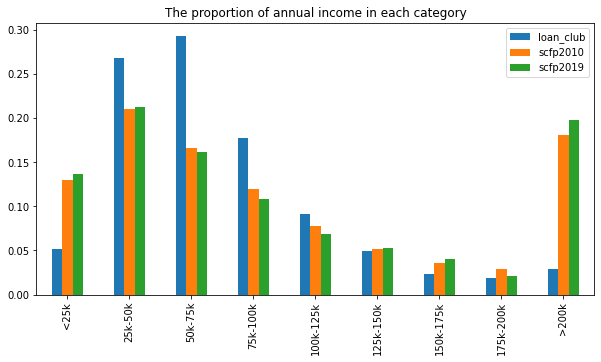

In [7]:
income_ratio.plot(kind="bar", title="The proportion of annual income in each category", figsize=(10, 5))

Since the numbers of data points of the three categories are not the same, we manually calssified the income range into 9 categories and calculated the proportion of annual income in each category respectively. According to the above chart, we can see that lending club has a higher percentage of income in the range of 25k-100k than general. And besides 0-25k, the general borrowers also show a peak at income > 200k, at which range the lending club users have a very few proportion.

### compare debt

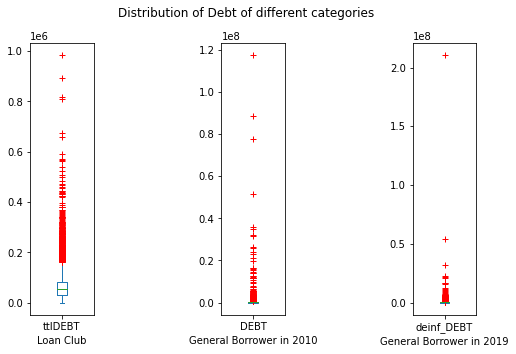

In [8]:
loan["ttlDEBT"]=loan["total_credit_utilized"]+loan["loan_amount"]
loan_debt=loan["ttlDEBT"]
scfp2010_debt = scfp2010_byCase["DEBT"]
scfp2019_debt = scfp2019_byCase["deinf_DEBT"]
p.draw_outliers([loan_debt, scfp2010_debt, scfp2019_debt], 'Distribution of Debt of different categories')

Again, we filtered the group with annual income less than 200,000 to obtain more significant visualization results. 

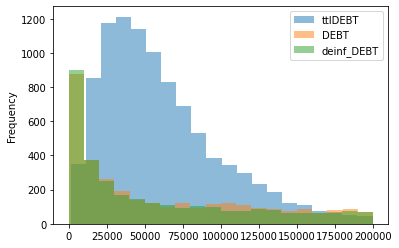

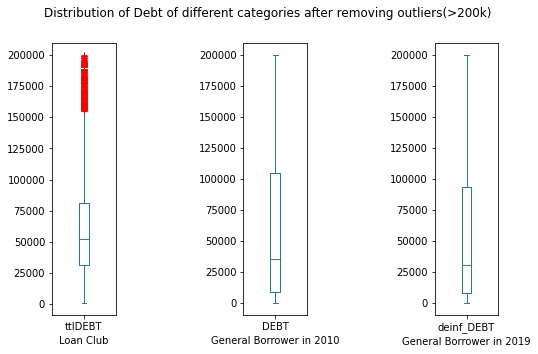

In [41]:
debt_remove_outlier=p.remove_outlier([loan_debt, scfp2010_debt,scfp2019_debt], 200000)
p.draw_outliers(debt_remove_outlier, 'Distribution of Debt of different categories after removing outliers(>200k)')

We used the sum of total credit utilized and the loan amoount authorized through lending club as the total debt of lending club users. When high debt is removed, we can see that the upper boundary of lending club is much lower than other two categories, approximately at 75k. And the lower boundary of lending club is higher, at about 25k. While the lower boundaries of other two are more close to 10k.  

In [10]:
bins=[0,25000,50000,75000,100000,125000,150000, 175000, 200000,np.inf]  
labels=["<25k","25k-50k","50k-75k","75k-100k","100k-125k","125k-150k", "150k-175k", "175k-200k", ">200k"]
rename_map={"ttlDEBT":"loan_club", "DEBT": "scfp2010", "deinf_DEBT":"scfp2019"}
debt_ratio = p.calculate_concat_ratio(loan_debt, scfp2010_debt, scfp2019_debt, bins, labels, rename_map, True)
debt_ratio

,loan_club,scfp2010,scfp2019
<25k,0.1634,0.294377,0.330447
25k-50k,0.2998,0.092321,0.099228
50k-75k,0.2252,0.059169,0.064592
75k-100k,0.1268,0.056022,0.059911
100k-125k,0.0785,0.057281,0.044933
125k-150k,0.0415,0.044901,0.044699
150k-175k,0.0224,0.038187,0.038615
175k-200k,0.0130,0.041544,0.036274
>200k,0.0294,0.316198,0.281301


<AxesSubplot:title={'center':'The proportion of debt in each category'}>

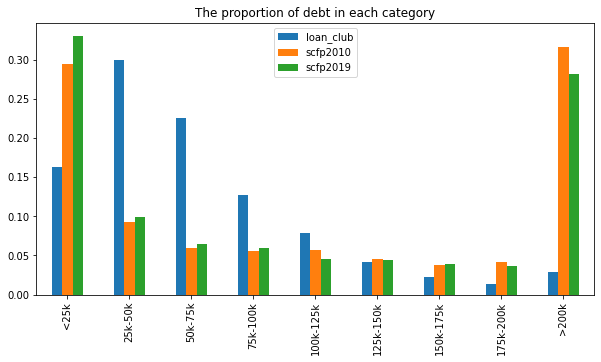

In [11]:
debt_ratio.plot(kind="bar", title="The proportion of debt in each category", figsize=(10, 5))

While looking at the proportion of debt balance in each category, we can see that lending club has a higher percentage of debt in the range of 25k-75k. And general borrower's debt peak are mainly at 0-25k and > 200k.Lending club has a higher debt  amount proportion than general, beside the amount value greater than 200k.

According to the above analysis, we find the similiar distribution between debt and income. So we come to a new assumption, is there any relationship between income and debt? Is it possible that richer people will be more likely to borrow large amounts?

<AxesSubplot:title={'center':'The relation between annual income and debt balance(both < 200000)'}, xlabel='deinf_INCOME', ylabel='deinf_DEBT'>

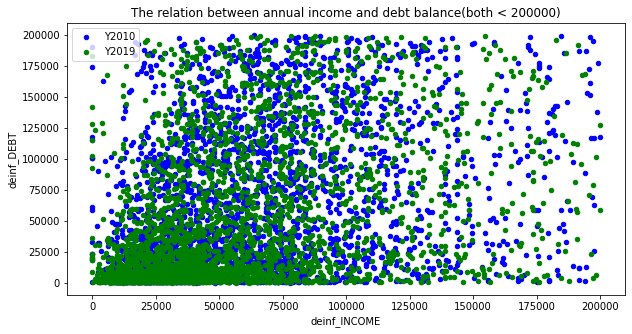

In [39]:
ax = scfp2010_byCase[(scfp2010_byCase["INCOME"]<200000) & (scfp2010_byCase["DEBT"]<200000)].plot.scatter(x='INCOME', y='DEBT', color='b', label='Y2010', figsize=(10, 5), title='The relation between annual income and debt balance(both < 200000)')
scfp2019_byCase[(scfp2019_byCase["deinf_INCOME"]<200000) & (scfp2019_byCase["deinf_DEBT"]<200000)].plot.scatter(x='deinf_INCOME', y='deinf_DEBT', color='g', label='Y2019',ax=ax, figsize=(10, 5))

<AxesSubplot:title={'center':'The relation between annual income and debt balance(200k-4000k)'}, xlabel='deinf_INCOME', ylabel='deinf_DEBT'>

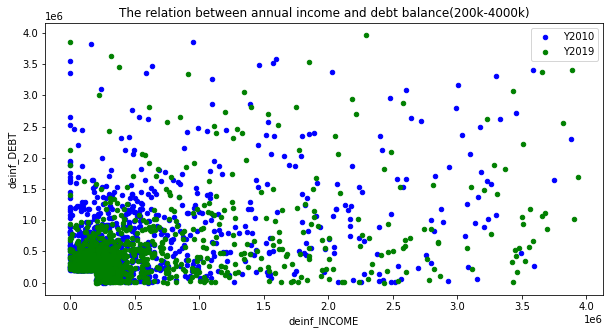

In [40]:
ax = scfp2010_byCase[((scfp2010_byCase["INCOME"]>200000) | (scfp2010_byCase["DEBT"]>200000))& ((scfp2010_byCase["DEBT"]<4000000)& (scfp2010_byCase["INCOME"]<4000000))].plot.scatter(x='INCOME', y='DEBT', color='b', label='Y2010', figsize=(10, 5), title='The relation between annual income and debt balance(200k-4000k)')
scfp2019_byCase[((scfp2019_byCase["deinf_INCOME"]>200000) | (scfp2019_byCase["deinf_DEBT"]>200000)) & ((scfp2019_byCase["deinf_DEBT"]<4000000)& (scfp2019_byCase["deinf_INCOME"]<4000000))].plot.scatter(x='deinf_INCOME', y='deinf_DEBT', color='g', label='Y2019',ax=ax, figsize=(10, 5))

To have a better visual presentation, we divided the data into two groups: those with both income and debt less than 200, and those with both income and debt less than 400 and either income or debt greater than 200, and plotted scatter plots based on their income and debt. Based on the charts, we can not see a clear correlation relationship between these two variables.

### compare debt to income ratio

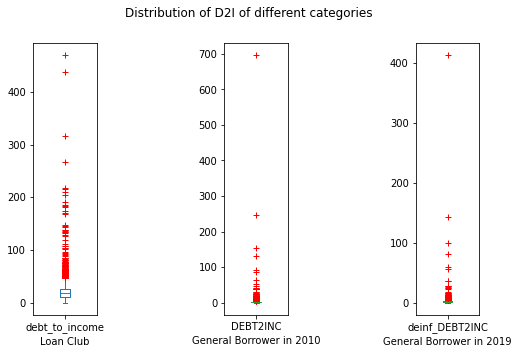

In [44]:
loan_D2I = loan["debt_to_income"]
scfp2010_D2I = scfp2010_byCase["DEBT2INC"]
scfp2019_D2I = scfp2019_byCase["deinf_DEBT2INC"]
p.draw_outliers([loan_D2I, scfp2010_D2I, scfp2019_D2I], 'Distribution of D2I of different categories')

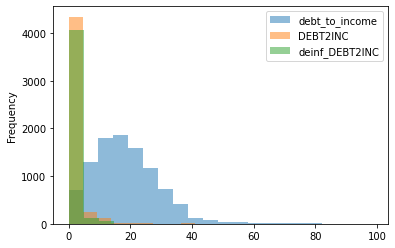

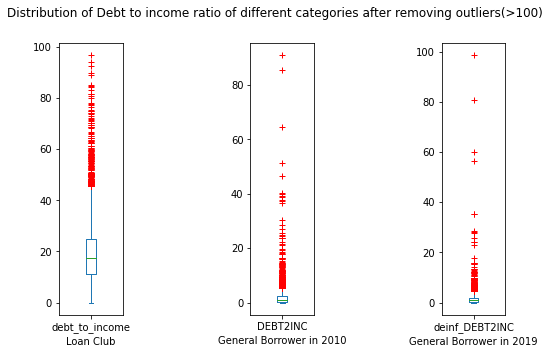

In [45]:
D2I_remove_outlier=p.remove_outlier([loan_D2I, scfp2010_D2I,scfp2019_D2I], 100)
p.draw_outliers(D2I_remove_outlier, 'Distribution of Debt to income ratio of different categories after removing outliers(>100)')

In [31]:
bins=[0,0.5,1,5,10,20,40,100, np.inf]  
labels=["<0.5","0.5-1","1-5","5-10","10-20","20-40", "40-100", ">100"]
rename_map={"debt_to_income":"loan_club", "DEBT2INC": "scfp2010", "deinf_DEBT2INC":"scfp2019"}
D2I_ratio = p.calculate_concat_ratio(loan_D2I, scfp2010_D2I, scfp2019_D2I, bins, labels, rename_map, True)
D2I_ratio

,loan_club,scfp2010,scfp2019
<0.5,0.003217,0.335711,0.380763
0.5-1,0.005730,0.155057,0.161479
1-5,0.063028,0.434117,0.412591
5-10,0.138420,0.057491,0.036040
10-20,0.380780,0.011750,0.005617
20-40,0.374849,0.003777,0.002106
40-100,0.030659,0.001259,0.000936
>100,0.003317,0.000839,0.000468


<AxesSubplot:title={'center':'The proportion of Debt to Income ratio in each category'}>

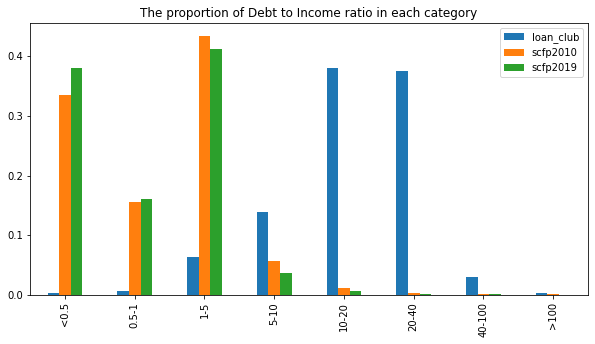

In [32]:
D2I_ratio.plot(kind="bar", title="The proportion of Debt to Income ratio in each category", figsize=(10, 5))

The chart of proportion of debt-to-income ratio shows a great difference between lending club users and general borrowers. About 40% general borrowers have a debt-to-income ratio less than 0.5, which is a healthy ratio. And about 90% general borrowers have a ratio less than 1.5. For lending club users, their debt-to-income ratio is greater than 5, the main range is betwen 10-40, which is very unhealthy. According to most commercial banks, the DTI requirement for conducting a regular conforming Loan authorization is usually 43%. This may be the reason why lending club users do not choose commercial banks for their loans. As a conclusion, lending club users have higher debt-to-income ratio, as well as worse economice situation than borrowers from all other lending resources.

### map

In [79]:
loan["state_cnt"]=loan["state"]
loan_by_state=loan.groupby("state",as_index=False)
state_income=loan_by_state.agg({"loan_amount":"sum", "state_cnt": "count"})
state_income["loan_per_case"]=state_income["loan_amount"]/state_income["state_cnt"]
state_income

,state,loan_amount,state_cnt,loan_per_case
0,AK,632850,33,19177.272727
1,AL,1946550,122,15955.327869
2,AR,979775,70,13996.785714
3,AZ,4113475,255,16131.274510
4,CA,22073700,1330,16596.766917
5,CO,4020525,235,17108.617021
6,CT,3258925,181,18005.110497
7,DC,394500,19,20763.157895
8,DE,300600,24,12525.000000
9,FL,11203675,732,15305.566940


In [80]:
fig = px.choropleth(state_income,
                    locations='state', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='loan_per_case',
                    color_continuous_scale="Viridis_r", 
                    
                    )
fig.show()